In [196]:
!pwd
!pip install -q Pillow
from google.colab.patches import cv2_imshow

/content


In [0]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load a color image in grayscale
img = cv.imread('sign.jpg', 0)
(thresh, img) = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

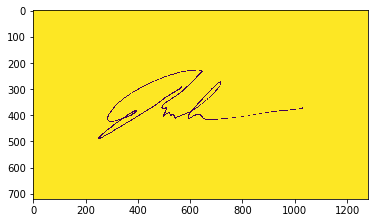

In [198]:
plt.imshow(img)

In [0]:
def box(img):
  height, width = img.shape
  print(width, height)
  left = width
  right = 0
  top = height
  bottom = 0
  for x in range(width):
    for y in range(height):
      #print(x, y)
      color = img[y, x]
      if color < 150:
        if x > right:
          right = x
        if x < left:
          left = x
        if y > bottom:
          bottom = y
        if y < top:
          top = y
  print(top, bottom, left, right)
  img = cv.rectangle(img, (left, top), (right, bottom), (0, 0, 0), 5)
  plt.imshow(img)
  return [img, left, top, right, bottom]

1280 720
227 491 246 1032


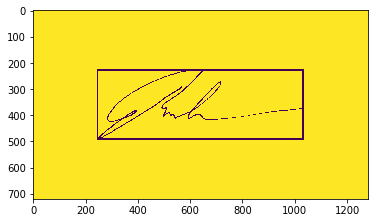

In [200]:
boxes= box(img)
#print(boxes)

In [0]:
def centroid(boxes):
  height, width = boxes[0].shape
  cx = boxes[1]
  cy = boxes[2]
  n = 0
  img = boxes[0]
  for  x  in  range(boxes[1], boxes[3]):
    for y  in  range(boxes[2], boxes[4]): 
      if img[y,x] == 0:
        cx  =  cx  +  x 
        cy  =  cy  +  y 
        n  =  n  +  1
  cx  =  cx  /  n 
  cy  =  cy  /  n
  print('centroid (x,y) = ', cy, cx)
  return (cy, cx)

In [202]:
centroid_cod = centroid(boxes)

centroid (x,y) =  354.8900735050659 574.3903052777962


In [0]:
def div_four(boxes, cent):
  y, x = cent
  y = int(y)
  x = int(x)
  img = boxes[0] 
  left = boxes[1]
  top = boxes[2]
  right = boxes[3]
  bottom = boxes[4]
  # img = cv.rectangle(img, (left, top), (x, y), (0, 0, 0), 2)
  # img = cv.rectangle(img, (boxes[1], y), (x, boxes[4]), (0, 0, 0), 2)
  # img = cv.rectangle(img,  (x, y), (boxes[3], boxes[4]), (0, 0, 0), 2)
  # img = cv.rectangle(img, (x, boxes[2]), (boxes[3], y), (0, 0, 0), 2)
  im1 = img[:y, :x]
  im2 = img[:y, x:]
  im3 = img[y:, :x]
  im4 = img[y:, x:]
  # cv.imshow(im1)
  # cv.imshow(im2)
  # cv.imshow(im3)
  # cv.imshow(im4)
  plt.imshow(img)
  return [im1, im2, im3, im4]

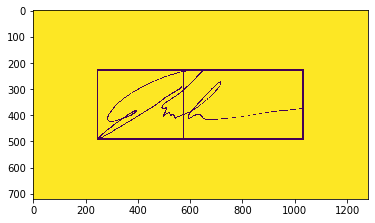

In [204]:
segments = div_four(boxes, centroid_cod)

In [0]:
def white_transition(img):
  height, width = img.shape
  prev = img[0, 0]
  n = 0
  for x in range(1, width):
    for y in range(1, height):
      curr = img[y, x]
      if curr > 200 and prev < 50:
        n = n + 1
      prev = curr
  #print(n)
  return (n)


In [206]:
for segment in segments:
  white_transition(segment)

1043
1133
1221
1431


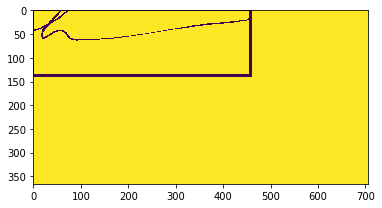

In [207]:
plt.imshow(segments[3])

In [0]:
def div_four_dim(boxes, cent):
  y, x = cent
  y = int(y)
  x = int(x)
  img = boxes[0] 
  left = boxes[1]
  top = boxes[2]
  right = boxes[3]
  bottom = boxes[4]
  img = cv.rectangle(img, (left, top), (x, y), (0, 0, 0), 2)
  img = cv.rectangle(img, (boxes[1], y), (x, boxes[4]), (0, 0, 0), 2)
  img = cv.rectangle(img,  (x, y), (boxes[3], boxes[4]), (0, 0, 0), 2)
  img = cv.rectangle(img, (x, boxes[2]), (boxes[3], y), (0, 0, 0), 2)
  return [[img, left, top, x, y], [img, boxes[1], y, x, boxes[4]], [img, x, y, boxes[3], boxes[4]], [img, x, boxes[2], boxes[3], y]]

In [0]:
img_dim = div_four_dim(boxes, centroid_cod)

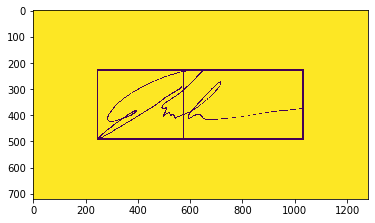

In [210]:
plt.imshow(img_dim[0][0])

In [211]:
centroid_list_4 = []
for seg in img_dim:
  centroid_list_4 =centroid_list_4 + [centroid(seg)]
print(centroid)

centroid (x,y) =  280.377998979071 427.0285860132721
centroid (x,y) =  420.14495720133976 382.4274283587644
centroid (x,y) =  417.96856835306784 785.7171151776104
centroid (x,y) =  270.8116397005554 763.7015213716494
<function centroid at 0x7fa9e0b84378>


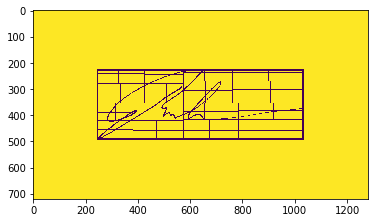

In [217]:
seg_4by4 = []
for i in range(len(img_dim)):
  seg_4by4 = seg_4by4 + [div_four_dim(img_dim[i], centroid_list_4[i])]

plt.imshow(img)

In [213]:
centroid_list_16 = []
for i in range(len(seg_4by4)):
  for seg in seg_4by4[i]:
    centroid_list_16 = centroid_list_16 + [centroid(seg)]

print(centroid)

centroid (x,y) =  242.13100436681222 325.14759825327513
centroid (x,y) =  312.2586477987421 333.04009433962267
centroid (x,y) =  316.4830623306233 511.93360433604335
centroid (x,y) =  245.69908814589667 500.0440729483283
centroid (x,y) =  389.331223628692 315.44163150492267
centroid (x,y) =  455.8937562940584 301.66817724068477
centroid (x,y) =  460.74870466321244 472.4438687392055
centroid (x,y) =  384.74110671936756 473.85375494071144
centroid (x,y) =  386.62156215621565 654.2513751375137
centroid (x,y) =  459.51664025356575 673.7686212361331
centroid (x,y) =  459.04810126582277 913.7810126582278
centroid (x,y) =  381.47179169249847 918.3099814011159
centroid (x,y) =  239.89209164818922 655.4708056171471
centroid (x,y) =  305.3352501437608 660.0132259919494
centroid (x,y) =  302.9009900990099 906.4513201320132
centroid (x,y) =  238.34462540716612 900.7648208469055
<function centroid at 0x7fa9e0b84378>


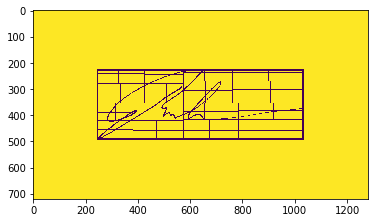

In [220]:
seg_16by16 = []
segments = []

for i in range(len(seg_4by4)):
  for j in range(len(seg_4by4[i])):
    seg_16by16 = seg_16by16 + [div_four_dim(seg_4by4[i][j], centroid_list_16[i*len(seg_4by4)+j])]    
    segments = segments + [div_four(seg_4by4[i][j], centroid_list_16[i*len(seg_4by4)+j])]  

plt.imshow(img)

In [227]:
i = 0
for segment in segments:
  for seg in segment:
    i = i + 1
    print('Segment # ', i, ": ", white_transition(seg))

Segment #  1 :  155
Segment #  2 :  1292
Segment #  3 :  721
Segment #  4 :  6116
Segment #  5 :  331
Segment #  6 :  2870
Segment #  7 :  630
Segment #  8 :  4459
Segment #  9 :  1125
Segment #  10 :  2218
Segment #  11 :  1770
Segment #  12 :  3137
Segment #  13 :  499
Segment #  14 :  1087
Segment #  15 :  2252
Segment #  16 :  4408
Segment #  17 :  410
Segment #  18 :  4816
Segment #  19 :  354
Segment #  20 :  2679
Segment #  21 :  433
Segment #  22 :  6184
Segment #  23 :  167
Segment #  24 :  1447
Segment #  25 :  2092
Segment #  26 :  5164
Segment #  27 :  382
Segment #  28 :  662
Segment #  29 :  1347
Segment #  30 :  3513
Segment #  31 :  1127
Segment #  32 :  2319
Segment #  33 :  2733
Segment #  34 :  2345
Segment #  35 :  1827
Segment #  36 :  1431
Segment #  37 :  3968
Segment #  38 :  3095
Segment #  39 :  780
Segment #  40 :  710
Segment #  41 :  6103
Segment #  42 :  961
Segment #  43 :  1254
Segment #  44 :  236
Segment #  45 :  3995
Segment #  46 :  689
Segment #  47